# flexible data reading


In [2]:
from torchvision.datasets import ImageFolder

In [4]:
# three folders, each folder has a total of 3 pictures as an example
folder_set = ImageFolder('./example_data/image/')

In [5]:
# 查看名称和类别下标的对应
folder_set.class_to_idx

{'class_1': 0, 'class_2': 1, 'class_3': 2}

In [7]:
# Get all picture names and tags
folder_set.imgs

[('./example_data/image/class_1/1.png', 0),
 ('./example_data/image/class_1/2.png', 0),
 ('./example_data/image/class_1/3.png', 0),
 ('./example_data/image/class_2/10.png', 1),
 ('./example_data/image/class_2/11.png', 1),
 ('./example_data/image/class_2/12.png', 1),
 ('./example_data/image/class_3/16.png', 2),
 ('./example_data/image/class_3/17.png', 2),
 ('./example_data/image/class_3/18.png', 2)]

In [11]:
# Take one of the data
im, label = folder_set[0]

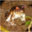

In [12]:
im

In [13]:
label

0

In [26]:
from torchvision import transforms as tfs

In [27]:
# incoming data preprocessing method
data_tf = tfs.ToTensor()

folder_set = ImageFolder('./example_data/image/', transform=data_tf)

im, label = folder_set[0]

In [28]:
im


(0 ,.,.) = 
  0.2314  0.1686  0.1961  ...   0.6196  0.5961  0.5804
  0.0627  0.0000  0.0706  ...   0.4824  0.4667  0.4784
  0.0980  0.0627  0.1922  ...   0.4627  0.4706  0.4275
           ...             ⋱             ...          
  0.8157  0.7882  0.7765  ...   0.6275  0.2196  0.2078
  0.7059  0.6784  0.7294  ...   0.7216  0.3804  0.3255
  0.6941  0.6588  0.7020  ...   0.8471  0.5922  0.4824

(1 ,.,.) = 
  0.2431  0.1804  0.1882  ...   0.5176  0.4902  0.4863
  0.0784  0.0000  0.0314  ...   0.3451  0.3255  0.3412
  0.0941  0.0275  0.1059  ...   0.3294  0.3294  0.2863
           ...             ⋱             ...          
  0.6667  0.6000  0.6314  ...   0.5216  0.1216  0.1333
  0.5451  0.4824  0.5647  ...   0.5804  0.2431  0.2078
  0.5647  0.5059  0.5569  ...   0.7216  0.4627  0.3608

(2 ,.,.) = 
  0.2471  0.1765  0.1686  ...   0.4235  0.4000  0.4039
  0.0784  0.0000  0.0000  ...   0.2157  0.1961  0.2235
  0.0824  0.0000  0.0314  ...   0.1961  0.1961  0.1647
           ...            

In [29]:
label

0

You can see that each data point is very convenient to access in this way.


## Dataset

In [3]:
from torch.utils.data import Dataset

In [30]:
# Define a subclass called custom_dataset, inherit from Dataset
class custom_dataset(Dataset):
    def __init__(self, txt_path, transform=None):
Self.transform = transform # incoming data preprocessing
        with open(txt_path, 'r') as f:
            lines = f.readlines()
        
Self.img_list = [i.split()[0] for i in lines] # Get all image names
Self.label_list = [i.split()[1] for i in lines] # Get all labels

Def __getitem__(self, idx): # Take one of the idx
        img = self.img_list[idx]
        label = self.label_list[idx]
        if self.transform is not None:
            img = self.transform(img)
        return img, label

Def __len__(self): # How much is the total data?
        return len(self.label_list)

In [31]:
txt_dataset = custom_dataset('.


In [32]:
# Get one of the data
data, label = txt_dataset[0]
print(data)
print(label)

1009_2.png
YOU


In [33]:
#取取一
data2, label2 = txt_dataset[34]
print(data2)
print(label2)

1046_7.png
LIFE


So in this way we can also easily define a data read-in, and also can easily define data pre-processing.


## DataLoader

In [34]:
from torch.utils.data import DataLoader

In [35]:
Train_data1 = DataLoader(folder_set, batch_size=2, shuffle=True) # 2 data as a batch


In [36]:
For im, label in train_data1: # access iterator
    print(label)


 1
 2
[torch.LongTensor of size 2]


 0
 1
[torch.LongTensor of size 2]


 0
 2
[torch.LongTensor of size 2]


 0
 2
[torch.LongTensor of size 2]


 1
[torch.LongTensor of size 1]



It can be seen that through training we can access all the data, the data is divided into 5 batches, the first 4 have two data, the last batch has only one data, because there are a total of 9 data, and the order is also Upset


Below we use the custom data to read in the example


In [41]:
train_data2 = DataLoader(txt_dataset, 8, True) # batch size 设置为 8


In [42]:
Im, label = next(iter(train_data2)) # Use this method to access the data of the first batch in the iterator


In [43]:
im

('377_10.png',
 '178_1.png',
 '5008_4.png',
 '5050_5.png',
 '716_3.png',
 '415_8.png',
 '858_6.png',
 '5086_10.png')

In [44]:
label

('AUGUST',
 'OTKRIJTE',
 'ASTAIRE',
 'BOONMEE',
 'OF',
 'CAUTION',
 'PROPANE',
 'PECC')

Now there is a need to fill the label of the above batch output to the same length, the short label is filled with 0, we need to use `collate_fn` to customize the processing of our batch, the following direct example


In [85]:
def collate_fn(batch):
Batch.sort(key=lambda x: len(x[1]), reverse=True) # Sort the dataset from largest to smallest according to the length of the label
Img, label = zip(*batch) # Pair the data with the label
#填充
    pad_label = []
    lens = []
    max_len = len(label[0])
    for i in range(len(label)):
        temp_label = label[i]
        temp_label += '0' * (max_len - len(label[i]))
        pad_label.append(temp_label)
        lens.append(len(label[i]))
    pad_label 
Return img, pad_label, lens # Output the true length of the label


Use our own definition of collate_fn to see the effect


In [91]:
train_data3 = DataLoader(txt_dataset, 8, True, collate_fn=collate_fn) # batch size 设置为 8


In [92]:
im, label, lens = next(iter(train_data3))

In [93]:
im

('5016_1.png',
 '2314_3.png',
 '731_9.png',
 '5019_4.png',
 '208_4.png',
 '5017_12.png',
 '5190_1.png',
 '855_12.png')

In [94]:
label

['LINDSAY',
 'ADDRESS',
 'MAIDEN0',
 'EINER00',
 'INDIA00',
 'GERE000',
 'JAWS000',
 'TD00000']

In [95]:
lens

[7, 7, 6, 5, 5, 4, 4, 2]

You can see that all the labels in a batch are arranged from long to short, and the short labels are all lengthened. Therefore, using collate_fn can easily process the data in a batch. In general, there are no special requirements. Use the built-in collate_fn in pytorch to meet the requirements.
